In [ ]:
#importing libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline #for inline ploting only when using jupyter notebook

In [2]:
#importing your data 
#make sure to have your data in your working directory
train_feature = pd.read_csv('dengue_features_train.csv')
train_label = pd.read_csv('dengue_labels_train.csv')
testing = pd.read_csv('dengue_features_test.csv')

In [3]:
#viewing data infomations
train_feature.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
train_label.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
testing.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [6]:
train_feature.info() #we can see there are missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [7]:
train_label.info() #a values are present, this is our label variable with the targer as total_cases

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [8]:
testing.info() #this also contains missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2  

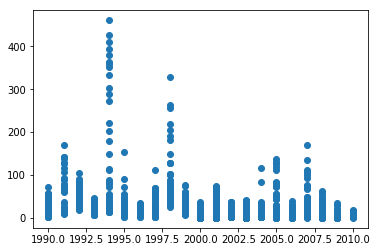

In [9]:
#visually representing amount of total_cases in each year
plt.scatter(train_feature['year'], train_label['total_cases'])

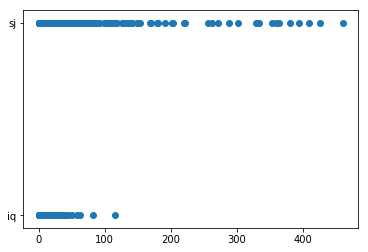

In [10]:
#checking the total_cases with our cities(which city have the most cases )
plt.scatter(train_label['total_cases'], train_label['city'])
#seeing we have more results in sj than iq this might affect out 
#model and cause it to overfit, i did not deal with that here though

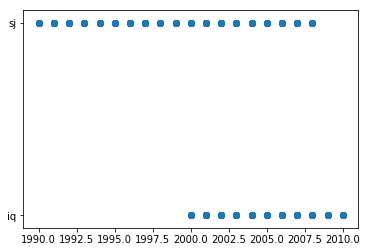

In [11]:
plt.scatter(train_label['year'], train_label['city']) #iq years are not as detailed as sj

# If we view our data well we can see that some data are missing and also we'll have problem passing in our datetime into the scikit-learn algorithm because it's an object,
# the city column just consit of two variable sj and iq, we can easily convert these two into numerical values, mahine learning models understand numbers better(so we'll create dummie variable of city

In [12]:
#so lets that by fillling our missing value (we'll forward fill for now,) you can always use imputer from the preprocessing 
#class of the sklearn library
train_feature = train_feature.fillna(method='ffill')
testing = testing.fillna(method='ffill')

In [14]:
train_feature.info()#all our missing values have been forward fill

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip

In [15]:
#cool, the function below will create a dummie variable for the city coloumn 
def city_dummie(data):
    df = 'city'
    data[df]= pd.get_dummies(data[df])
    return data[df]
city_dummie(train_feature)
city_dummie(testing) #done

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
386    1
387    1
388    1
389    1
390    1
391    1
392    1
393    1
394    1
395    1
396    1
397    1
398    1
399    1
400    1
401    1
402    1
403    1
404    1
405    1
406    1
407    1
408    1
409    1
410    1
411    1
412    1
413    1
414    1
415    1
Name: city, Length: 416, dtype: uint8

In [16]:
#function here will convert our date to interger notice the divisor
def convert_date(data):
    week_date =  'week_start_date'
    divisor = 1000000000
    data[week_date] = pd.to_datetime(data[week_date])
    data[week_date] = np.int64(data[week_date]) / divisor
    return data[week_date]
convert_date(train_feature)
convert_date(testing)

0      1.209427e+09
1      1.210032e+09
2      1.210637e+09
3      1.211242e+09
4      1.211846e+09
5      1.212451e+09
6      1.213056e+09
7      1.213661e+09
8      1.214266e+09
9      1.214870e+09
10     1.215475e+09
11     1.216080e+09
12     1.216685e+09
13     1.217290e+09
14     1.217894e+09
15     1.218499e+09
16     1.219104e+09
17     1.219709e+09
18     1.220314e+09
19     1.220918e+09
20     1.221523e+09
21     1.222128e+09
22     1.222733e+09
23     1.223338e+09
24     1.223942e+09
25     1.224547e+09
26     1.225152e+09
27     1.225757e+09
28     1.226362e+09
29     1.226966e+09
           ...     
386    1.354406e+09
387    1.355011e+09
388    1.355616e+09
389    1.356221e+09
390    1.356998e+09
391    1.357603e+09
392    1.358208e+09
393    1.358813e+09
394    1.359418e+09
395    1.360022e+09
396    1.360627e+09
397    1.361232e+09
398    1.361837e+09
399    1.362442e+09
400    1.363046e+09
401    1.363651e+09
402    1.364256e+09
403    1.364861e+09
404    1.365466e+09


In [17]:
#so lets check our data one more time 
train_feature.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1990,18,641433600.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1990,19,642038400.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1990,20,642643200.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1990,21,643248000.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1990,22,643852800.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [18]:
train_feature.info() #you can see all our data type are are now numerical so can begin our training wheeww!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null uint8
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null float64
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip

In [19]:
train_feature.describe()
#but before we continue we see that are data is widely spread, it will be nice to scale all the figures
#it  makes our model better

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.357143,2001.031593,26.503434,9.946945e+08,0.131271,0.128068,0.202606,0.201987,45.686937,298.697965,...,40.111635,82.176203,45.686937,16.745565,4.898656,27.180313,8.085646,32.443338,22.099863,39.194162
std,0.479322,5.408314,15.019437,1.702440e+08,0.138527,0.119561,0.074409,0.083592,43.779318,1.361950,...,43.329174,7.161016,43.779318,1.542276,3.542340,1.280861,2.122836,1.960769,1.569113,47.363305
min,0.000000,1990.000000,1.000000,6.414336e+08,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.000000,1997.000000,13.750000,8.622072e+08,0.039100,0.048250,0.152795,0.144455,9.655000,297.654643,...,13.085000,77.185714,9.655000,15.560000,2.328571,26.300000,6.528571,31.100000,21.100000,8.700000
50%,0.000000,2002.000000,26.500000,1.022544e+09,0.113900,0.115926,0.195664,0.190121,38.235000,298.646429,...,27.245000,80.301429,38.235000,17.087143,2.857143,27.400000,7.364286,32.800000,22.200000,23.800000
75%,1.000000,2005.000000,39.250000,1.132963e+09,0.232018,0.213429,0.247461,0.246775,70.227500,299.827500,...,52.200000,86.406429,70.227500,17.977500,7.617857,28.132143,9.600000,33.900000,23.300000,53.675000
max,1.000000,2010.000000,53.000000,1.277424e+09,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [20]:
#function below does that
def standardscaler(data):
    scaled = data.drop(['city', 'year', 'weekofyear'], axis=1)
    unscaled = data[['city', 'year', 'weekofyear']]
    from sklearn.preprocessing import StandardScaler
    SS = StandardScaler()
    SS.fit(scaled)
    new_scaled = SS.transform(scaled)
    scaled_frame = pd.DataFrame(new_scaled, columns = scaled.columns)
    new_data = pd.concat([unscaled, scaled_frame], axis=1)
    return new_data
#yeah looks compelex abi? i exctracted the coulumns i want to scale and the ones i'm not, imported standardscaler from
#preprocessing, i instatiate it fit it into the scaling model, transformed it created a new data frame notce the concat 
#method for joining dataframes.
#play around with this is pretty easy

In [21]:
#now i need to call my function
X = standardscaler(train_feature)
test_data = standardscaler(testing)
Y = train_label['total_cases'] # since only need the total_cases i brought it out and store it in a new variable

In [22]:
#lets machine learing our way out of here
#we'll first split our training data to test you should know this
from sklearn.cross_validation import train_test_split

In [23]:
X_test,X_train,y_test,y_train = train_test_split(X,Y, random_state= 42, test_size=0.3)# our test size is 30% of training data

In [24]:
#i'll use decision tree for my model u can read it up its cool
from sklearn.tree import DecisionTreeClassifier

In [25]:
#i'll instantiate my model
Model = DecisionTreeClassifier()

In [26]:
Model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
#now i want to get my traning our testing score
print('Training score is {}'.format(Model.score(X_train, y_train)))
print('\n')
print('Testing score is {}'.format(Model.score(X_test, y_test)))

Training score is 1.0


Testing score is 0.07948969578017664


absurd right

In [28]:
#lets chech our accuracy and and error
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report, confusion_matrix

In [29]:
#lets make our prediction first
training_predict = Model.predict(X_test)

In [30]:
print("Accuracy score is {}".format(accuracy_score(y_test, training_predict)))
print('\n')
print('Mean absolute error is {}'.format(mean_absolute_error(y_test, training_predict)))
print('\n')
print('Confusion_matrix is {}'.format(confusion_matrix(y_test, training_predict)))

Accuracy score is 0.07948969578017664


Mean absolute error is 19.97939156035329


Confusion_matrix is [[38  2  3 ...  0  0  0]
 [ 6  2  6 ...  0  0  0]
 [ 1  3  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [32]:
#now lets fit our training data and testing data
Model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
prediction = Model.predict(test_data)

In [34]:
#lets check our prediction
prediction

array([  5,   5,   5,   5,   5,   5,  20,  18,  10,  10,   6,  17,  17,
        10, 140,  20,  21,  65,  31,  33,  25,  33,  56,  65,  33,  66,
        33,  61, 140,  13, 129,  78,  70, 129,  27,  55,  56,  32,  36,
        36,  25,  39,  38,  26,  23,  10,  24,  24,  18,  13,  13,  24,
        24,   6,  17,  10,  20,  14,  31,  31,  31,  16,  34,  38,  38,
         6,  73, 129, 102,  66,  36,  21,  47,  35,  31,  42,  49,  31,
        46,  35,  29, 381,  36, 115, 129, 115, 108, 108,  14,  17,  75,
        56,  24,  91,  75,  75,  64,   2,  50,  10,  10,  10,  22,  14,
        16,  10,  30,  14, 256,  14,  25,  30,  14,  20,   7,  59,  11,
        14,  17,  67,  31,  66,  40,  40,  99,  57,  37,  33,  33, 115,
       426,  35,  17,  17,   6,   3,   1,   0,   0,   3,   5,  10,  15,
        14,  20,  28,  28,  20,   2,   1,   2,   6,   4,   2,   8,   4,
         7,   7,   6,   4,   4,   3,   3,   7,   1,   1,   4,   6,   4,
         4,   4,   6,   6,   7,   5,  10,   7,   8,  32,  21,   

In [35]:
#import your submision format
submission = pd.read_csv('submission_format.csv')

In [36]:
#change the total_case column
submission['total_cases'] =prediction
#check your submission head
submission.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,5
1,sj,2008,19,5
2,sj,2008,20,5
3,sj,2008,21,5
4,sj,2008,22,5


In [38]:
#now convert your dataframe into csv
#give it no index 
submission.to_csv('submission8.csv', index=None)

# go make your submission, thanks for allowing me to share my idea, not the best though but it's something, we can  always work to make it better,

# all code written by me a